<a href="https://colab.research.google.com/github/OptimalDecisions/sports-analytics-foundations/blob/main/data-visualization/Data_Visualization_3_1_Plotting_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  ## Data Visualization



  # Plotting with Pandas

  <img src = "../img/sa_logo.png" width="100" align="left">

  Ram Narasimhan

  <br><br><br>

  << [3.0 Visualization Overview](Data_Visualization_3_0_Overview.ipynb) | [3.1 Visualization Using Pandas](Pandas_Intermediate_2_10_GroupBy.ipynb)  >>




Concepts covered in this notebook.

1. Exploratory vs Explanatory Plots
  - When to use which
2. Plotting Libraries
- Pandas
- Matplotlib
- Seaborn

3. Basic and Common Visualization Types
- Line Plot
- Scatter Plot
- Bar Plot
- Histogram
- Box Plot

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = "https://datacrayon.com/datasets/athlete_events_known_age.csv"
df = pd.read_csv(url)

In [3]:
sports_to_keep = ['Basketball', 'Judo', 'Speed Skating', 'Cross Country Skiing',
          'Athletics', 'Ice Hockey', 'Badminton', 'Sailing',
          'Gymnastics', 'Alpine Skiing', 'Archery',
          'Volleyball', 'Cycling']

df = df[df['Sport'].isin(sports_to_keep)]
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

## 1. Why Plot with Pandas?

Plotting with Pandas is a powerful tool for Exploratory Data Analysis (EDA).
- due to its seamless integration with data manipulation and analysis functionalities. Pandas provides a high-level interface that allows users to generate a wide array of visualizations with just a few lines of code, making it particularly accessible for beginners.
- The ability to create diverse plots, including line plots, bar plots, scatter plots, histograms, and more, facilitates a comprehensive understanding of the dataset's structure and patterns.
- Through visualizations, data analysts can quickly identify trends, outliers, and relationships within the data, aiding in the formulation of hypotheses and guiding further investigation.
- Moreover, Pandas' integration with Matplotlib, a widely-used plotting library, extends its capabilities, enabling users to customize and refine their visualizations for clearer insights. Overall, the ease and versatility of Pandas make it an indispensable tool for analysts seeking to visually explore and communicate key aspects of their datasets during the early stages of data analysis.

## 2. Basic Plot Types

### 2.1. Line Plot Using Pandas

Description: Line plots are used to visualize the trend or pattern in a continuous dataset over a specific range.

They are particularly useful for showing changes over time or across different categories.




Let's say that we want to look at the trend of USA's Number of Summer Olympic athletes over the years.

Here's how we'd do it.

*Logic*
- 1. Group by Season, Country and Year
- 2. Count the total athletes in each group
- 3. Filter down just to Summer and USA
- 4. Store the results in a mini df

In [4]:
grp = df.groupby(['NOC', 'Season', 'Year'])['ID'].count().reset_index()
cond1 = grp['NOC']=='USA'
cond2 = grp['Season']=='Summer'
usa_summer = grp[cond1 & cond2]
usa_summer

,NOC,Season,Year,ID
3140,USA,Summer,1896,16
3141,USA,Summer,1900,34
3142,USA,Summer,1904,140
3143,USA,Summer,1906,56
3144,USA,Summer,1908,128
3145,USA,Summer,1912,177
3146,USA,Summer,1920,139
3147,USA,Summer,1924,148
3148,USA,Summer,1928,108
3149,USA,Summer,1932,89


Now that the data is ready, Pandas makes it really easy to plot it. All we need are the x-axis (usually time) and a Y-value to plot over time. In this case the number of Athletes.

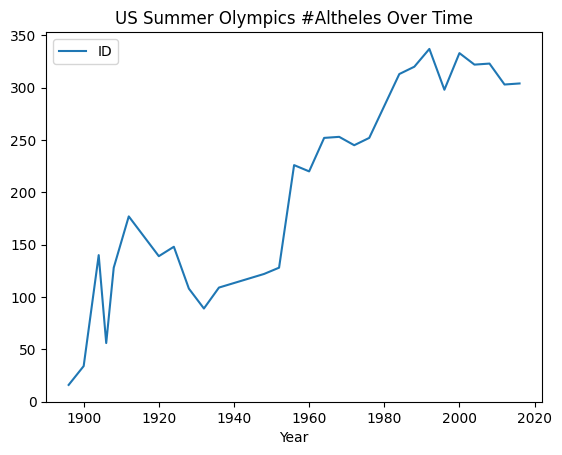

In [5]:
title = 'US Summer Olympics #Altheles Over Time'
usa_summer.plot(x='Year', y='ID', kind='line', title=title, legend=True)
plt.show()

### 2.2. Scatter Plots

Scatter plots display individual data points on a XY plane, revealing the relationship between two continuous variables.

- They are excellent for identifying patterns, clusters, or outliers in data.



<Figure size 800x400 with 0 Axes>

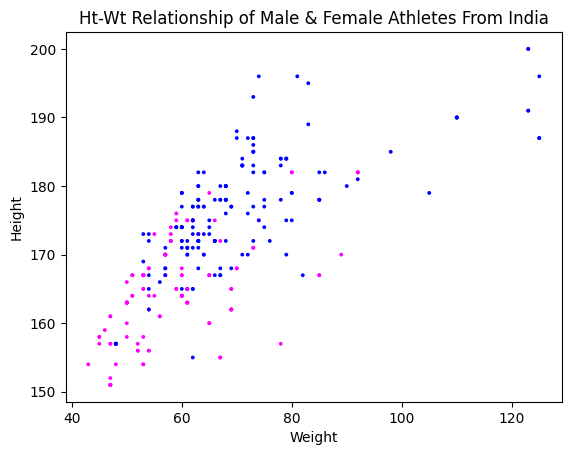

In [7]:
# Scatter Plot
plt.figure(figsize=(8, 4))
mini_df = df[df['NOC']=='IND']
colors = {'M': 'blue', 'F': 'magenta'}
mini_df.plot.scatter(x='Weight', y='Height',
                     c=mini_df['Sex'].map(colors),
                     s=3);
plt.title('Ht-Wt Relationship of Male & Female Athletes From India')
plt.show();



### 3.3. Bar Plot

Pandas makes it easy to create bar plots -- we use the `kind='bar'` argument.

Note that for a bar plot, we need 2 columns -- one Categorical, and one numerical.

If our `df` has a individual data points, it is common to first `groupby` and to draw bar plots on that summarized data.

The example below illustrates how we can use two categorical columns to draw bars of two colors.

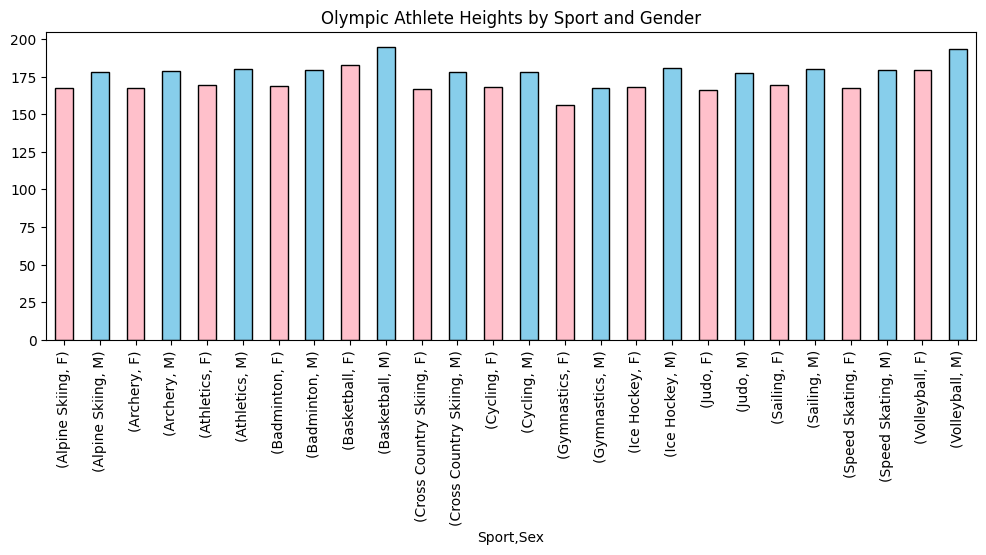

In [8]:
# Bar Plot Using Pandas
plt.figure(figsize=(12, 4))
(df.groupby(['Sport', 'Sex'])['Height'].mean()
.plot(kind='bar',
      edgecolor='black',
      color=['pink', 'skyblue'],
      title = 'Olympic Athlete Heights by Sport and Gender')
)
plt.show()


See what the columns of the Grouped Dataframe are:

In [9]:
df.groupby(['Sport', 'Sex'])['Height'].mean().unstack().columns

Index(['F', 'M'], dtype='object', name='Sex')

In [10]:
df.groupby(['Sport', 'Sex'])['Height'].mean()


Sport                 Sex
Alpine Skiing         F      167.221001
                      M      177.911182
Archery               F      167.157837
                      M      178.477842
Athletics             F      169.294780
                      M      179.827983
Badminton             F      168.438519
                      M      179.620787
Basketball            F      182.454836
                      M      194.992328
Cross Country Skiing  F      166.650819
                      M      177.773647
Cycling               F      168.018629
                      M      177.794381
Gymnastics            F      156.146242
                      M      167.636695
Ice Hockey            F      168.209549
                      M      180.991444
Judo                  F      166.267000
                      M      177.522068
Sailing               F      169.510808
                      M      180.169588
Speed Skating         F      167.420704
                      M      179.185373
Volleyball    

### 2.4 Histogram

Pandas has a straightforward command: `df.hist()`
This plots histograms of *every* numeric column in the dataframe, for us to examine.

Histograms are useful for understanding the data's underlying structure.

Caution: If there are dozens and dozens of numeric columns, then use this function with care.


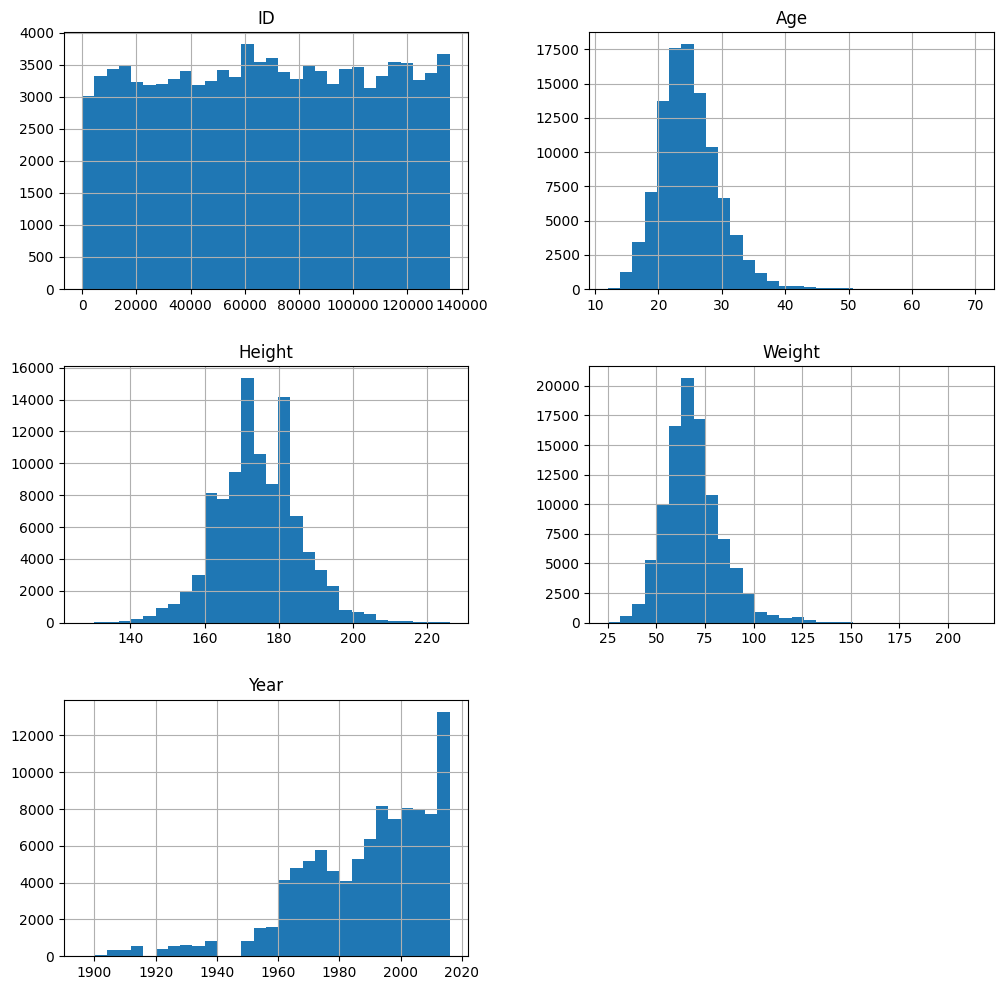

In [19]:
# Histograms for the entire datafram
df.hist(bins=30,figsize=(12, 12))
plt.show()

### 2.5. Box Plot Using Pandas

Pandas Dataframes are deeply integrated with matplotlib to facilitate plotting. Thus df.boxplot() works.

- Box plots are used to depict the distribution of a dataset and highlight measures such as the median, quartiles, and potential outliers.

- One place where I find boxplots particularly useful is when I'm comparing distributions across different groups.


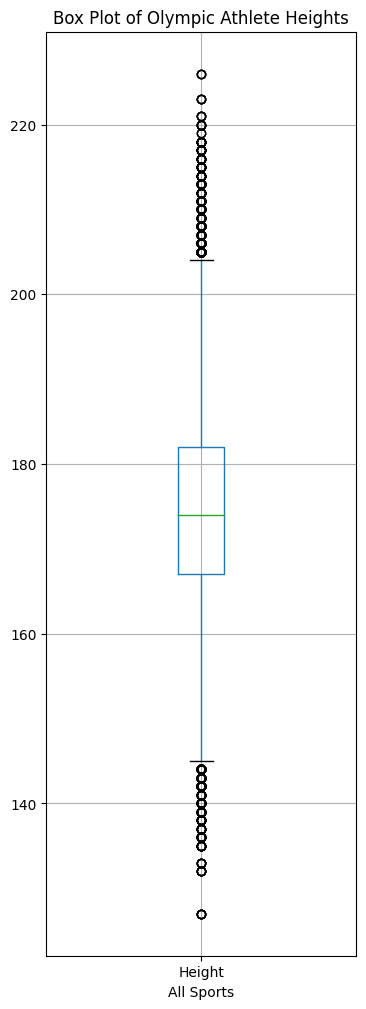

In [24]:
# Box Plot
plt.figure(figsize=(4,12))
df.boxplot(column='Height')
plt.title('Box Plot of Olympic Athlete Heights')
plt.xlabel('All Sports')
plt.show()
